In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [187]:
data = pd.read_csv('payment_fraud.csv')
print(f'unique label values     : {data["label"].unique()}')
print(f'number of unique labels : {data["label"].value_counts()}')
nancount = 0
nonnancount = 0

for row in data.itertuples():
    if row.label == 1:
        if pd.isna(row.Category) or pd.isna(row.isWeekend):
            nancount += 1
        else:
            nonnancount += 1


print(f'Number of rows with label 1 and NaN Category: {nancount}')
print(f'Number of rows with label 1 and non-NaN Category: {nonnancount}')

total_rows, _ = data.shape
print(f'Original data shape: {data.shape}')


unique label values     : [0 1]
number of unique labels : label
0    38661
1      560
Name: count, dtype: int64
Number of rows with label 1 and NaN Category: 560
Number of rows with label 1 and non-NaN Category: 0
Original data shape: (39221, 8)


## Data Cleaning

In [188]:
account_age = data['accountAgeDays']
aa_nans = account_age.isna().sum()
print(f'accountAgeDays NaNs: {aa_nans}')
print(f'NaN Percentage: {aa_nans / total_rows * 100:.2f}%')

numItems = data['numItems']
ni_nans = numItems.isna().sum()
print(f'numItems NaNs: {ni_nans}')
print(f'NaN Percentage: {ni_nans / total_rows * 100:.2f}%')

localTime = data['localTime']
lt_nans = localTime.isna().sum()
print(f'localTime NaNs: {lt_nans}')
print(f'NaN Percentage: {lt_nans / total_rows * 100:.2f}%')

payment_method = data['paymentMethod']
pm_nans = payment_method.isna().sum()
print(f'paymentMethod NaNs: {pm_nans}')
print(f'NaN Percentage: {pm_nans / total_rows * 100:.2f}%')

pmage = data['paymentMethodAgeDays']
pmage_nans = pmage.isna().sum()
print(f'paymentMethodAgeDays NaNs: {pmage_nans}')
print(f'NaN Percentage: {pmage_nans / total_rows * 100:.2f}%')

cat = data['Category']
cat_nans = cat.isna().sum()
print(f'Category NaNs: {cat_nans}')
print(f'NaN Percentage: {cat_nans / total_rows * 100:.2f}%')

iw = data['isWeekend']
iw_nans = iw.isna().sum()
print(f'isWeekend NaNs: {iw_nans}')
print(f'NaN Percentage: {iw_nans / total_rows * 100:.2f}%')




accountAgeDays NaNs: 0
NaN Percentage: 0.00%
numItems NaNs: 0
NaN Percentage: 0.00%
localTime NaNs: 0
NaN Percentage: 0.00%
paymentMethod NaNs: 0
NaN Percentage: 0.00%
paymentMethodAgeDays NaNs: 0
NaN Percentage: 0.00%
Category NaNs: 95
NaN Percentage: 0.24%
isWeekend NaNs: 560
NaN Percentage: 1.43%


In [189]:
# Calculate the distribution of isWeekend for each label

isweekend1_prcent = len(data[data['isWeekend'] == 1]) / total_rows * 100
isweekend0_prcent = len(data[data['isWeekend'] == 0]) / total_rows * 100
print(f'isWeekend 1%: {isweekend1_prcent:.2f}')
print(f'isWeekend 0%: {isweekend0_prcent:.2f}')

final_0percent = (isweekend0_prcent / (isweekend0_prcent + isweekend1_prcent))* 100
final_1percent = (isweekend1_prcent / (isweekend0_prcent + isweekend1_prcent) )* 100

print(f'Final isWeekend 0%: {final_0percent:.2f}')
print(f'Final isWeekend 1%: {final_1percent:.2f}')
# Use the already calculated final_1percent and final_0percent variables

for row in data.itertuples():
    if pd.isna(row.isWeekend):
        choice = np.random.choice([0, 1], p=[final_0percent / 100, final_1percent / 100])
        data.at[row.Index, 'isWeekend'] = choice
        data.at[row.Index, 'isWeekend_missing'] = 1
    else:
        data.at[row.Index, 'isWeekend_missing'] = 0

print('isweekend value counts after filling NaNs:')
print(data['isWeekend'].value_counts())
print(f'isweekend missing value counts: {data["isWeekend_missing"].value_counts()}')


isWeekend 1%: 49.24
isWeekend 0%: 49.33
Final isWeekend 0%: 50.05
Final isWeekend 1%: 49.95
isweekend value counts after filling NaNs:
isWeekend
0.0    19619
1.0    19602
Name: count, dtype: int64
isweekend missing value counts: isWeekend_missing
0.0    38661
1.0      560
Name: count, dtype: int64


## Feature Exploration and Engineering

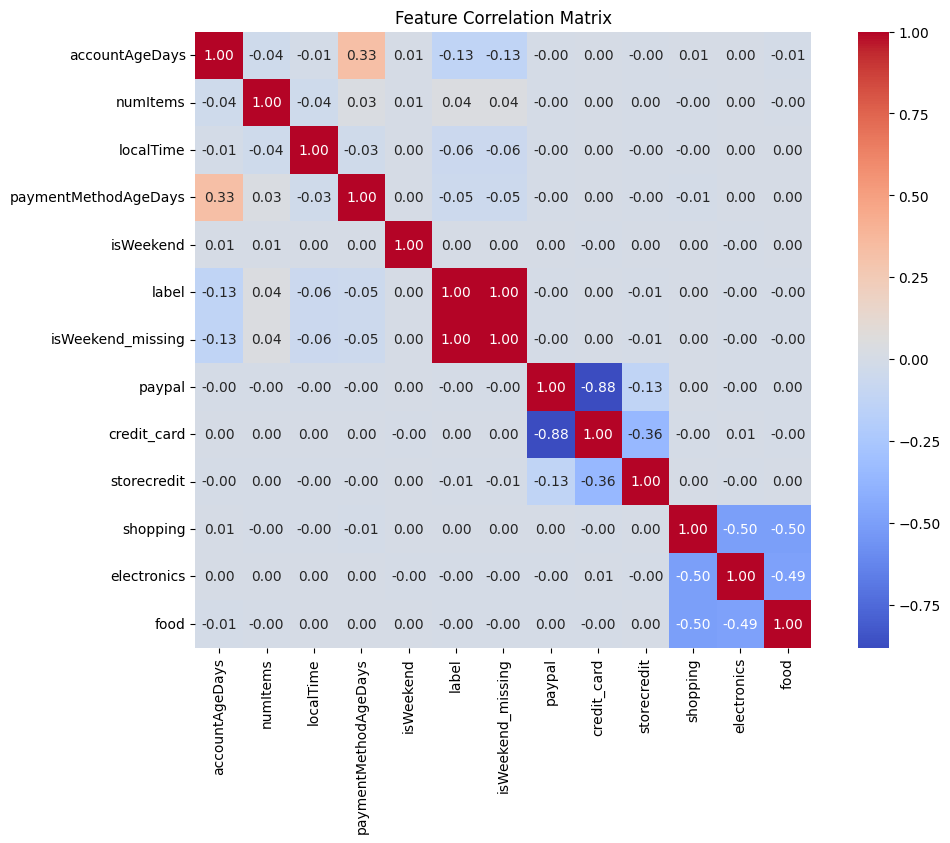

In [190]:
# categorise binary variable 

data['paypal'] = data['paymentMethod'].apply(lambda x: 1 if x == 'paypal' else 0)
data['credit_card'] = data['paymentMethod'].apply(lambda x: 1 if x == 'creditcard' else 0)
data['storecredit'] = data['paymentMethod'].apply(lambda x: 1 if x == 'storecredit' else 0)
data['shopping'] = data['Category'].apply(lambda x: 1 if x == 'shopping' else 0)
data['electronics'] = data['Category'].apply(lambda x: 1 if x == 'electronics' else 0)
data['food'] = data['Category'].apply(lambda x: 1 if x == 'food' else 0)
data['label'] = data['label'].apply(lambda x: 1 if x == 1 else 0)
                                                                

data.drop(columns=['paymentMethod'], inplace=True)
data.drop(columns=['Category'], inplace=True)
corr = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()


In [27]:
payment_method = data['paymentMethod']
print(f'paymentMethod shape: {payment_method.shape}')
print(f'paymentMethod unique values: {payment_method.unique()}')

data['paypal'] = data['paymentMethod'].apply(lambda x: 1 if x == 'paypal' else 0)
data['credit_card'] = data['paymentMethod'].apply(lambda x: 1 if x == 'credit_card' else 0)
data['storecredit'] = data['paymentMethod'].apply(lambda x: 1 if x == 'storecredit' else 0)


paymentMethod shape: (39221,)
paymentMethod unique values: ['paypal' 'storecredit' 'creditcard']


paypal counts:
paypal
0    29918
1     9303
Name: count, dtype: int64


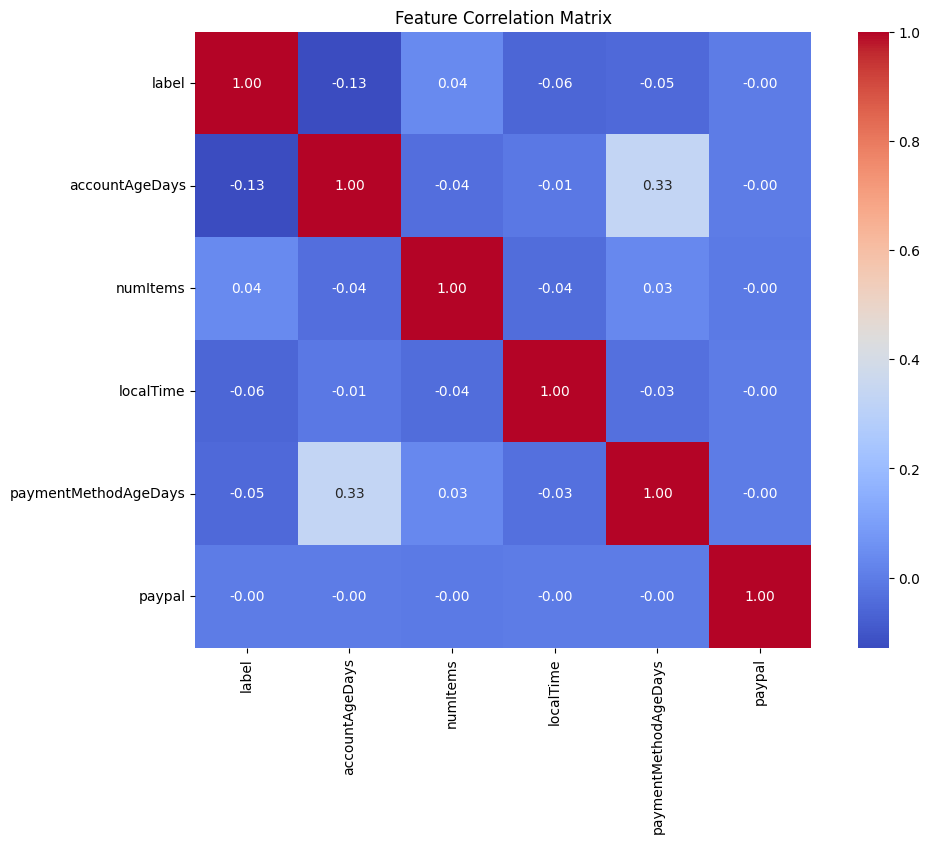

In [ ]:
df_encoded = data.copy()

labels = df_encoded[target]
acc_age = df_encoded['accountAgeDays']
num_items = df_encoded['numItems']
time = df_encoded['localTime']
payment_method = df_encoded['paymentMethodAgeDays']
paypal = df_encoded['paypal']


labels = pd.DataFrame(labels)
acc_age = pd.DataFrame(acc_age)
num_items = pd.DataFrame(num_items)
time = pd.DataFrame(time)
payment_method = pd.DataFrame(payment_method)
paypal = pd.DataFrame(paypal)

df = pd.concat([labels, acc_age,num_items,time, payment_method,paypal], axis=1)
# print(df.head())

corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()


In [11]:
## Feature Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()
## Feature Exploration and Engineering



ValueError: could not convert string to float: 'paypal'